# EE2211

Run the following cell below before executing any of the code snippets below

<div align="right"> 
    Notebook produced by 
    <a href="https://github.com/jinxuan-owyong" rel="noopener" target="_blank">
        Jin Xuan Ow Yong
    </a>
</div>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

def readNumpyArray(name = "the matrix"):
    rows = int(input(f"Enter the number of rows in {name}: "))
    cols = int(input(f"Enter the number of columns in {name}: "))
    arr = []
    print("Each element should be separated using the space character")
    for r in range(1, rows + 1):
        arr.append(list(map(float, input(f"Enter the values in row {r}: ").split())))
    return np.array(arr)

def addBias(x):
    bias = [[1] for i in range(len(x))]
    return np.hstack((np.array(bias), x))
    
def coefToEquation(coef, c=0):
    x_vars = [f"{coef[i]}x_{i+1}" for i in range(len(coef))]
    print("The regression equation is \ny = " , end='')
    for i in range(len(x_vars)):
        if x_vars[i][0] != '-' and i != 0:
            print('+ ', end='')
        print(x_vars[i], end=' ')
    if c != 0:
        print(f"+ {c}")

## Pandas DataFrame

### Reading Data from CSV

In [ ]:
cwd = os.getcwd()
file_path = cwd + "\\<file name>.csv"
df = pd.read_csv(file_path)
df.head()

### Convert array into dataframe

In [2]:
data = [
    [1.2234, 0.3302, 123.50, 0.0081, 30033.81, 1],
    [1.3456, 0.3208, 113.24, 0.0067, 29283.18, -1],
    [0.9988, 0.2326, 133.45, 0.0093, 36034.33, 1],
    [1.1858, 0.4301, 128.55, 0.0077, 34037.35, 1],
    [1.1533, 0.3853, 116.70, 0.0066, 22033.58, -13], 
    [1.2755, 0.3102, 118.30, 0.0098, 30183.65, 1],
    [1.0045, 0.2901, 123.52, 0.0065, 31093.98, -1],
    [1.1131, 0.3912, 113.15, 0.0088, 29033.23, -1]
]
df = pd.DataFrame(data)

### Summary of values

_count, mean, std, min, 25%, 50%, 75%, max_

In [3]:
df.describe()

,0,1,2,3,4,5
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,1.162500,0.336312,121.301250,0.007938,30216.638750,-1.50000
std,0.122377,0.063314,7.285009,0.001284,4114.119594,4.75094
min,0.998800,0.232600,113.150000,0.006500,22033.580000,-13.00000
25%,1.085950,0.305175,115.835000,0.006675,29220.692500,-1.00000
50%,1.169550,0.325500,120.900000,0.007900,30108.730000,0.00000
75%,1.236425,0.386775,124.777500,0.008925,31829.822500,1.00000
max,1.345600,0.430100,133.450000,0.009800,36034.330000,1.00000


### Count number of zeroes

In [ ]:
(df[col] == 0).sum()

### Replace zeroes with NaN

In [ ]:
df[col] = df[col].replace(0, np.NaN)

## Statistics

In [4]:
from scipy.stats import pearsonr
x1 = pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
print(x1)

(-0.7426106572325056, 0.15055580885344558)


### Pearson Coefficient $r$

`scipy.stats.pearsonr(x, y, *, alternative='two-sided')`

__alternative__

Defines the alternative hypothesis. Default is ‘two-sided’. 

The following options are available:
- ‘two-sided’: the correlation is nonzero
- ‘less’: the correlation is negative (less than zero)
- ‘greater’: the correlation is positive (greater than zero)

### Calculating Normal Distribution

```
Signature: stats.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
```

In [5]:
from scipy.stats import norm
upper = norm.cdf(x=33, loc=30, scale=1.8) # x, mean, standard deviation
lower = norm.cdf(x=28, loc=30, scale=1.8)
upper - lower

0.8189493848246799

### Z-score normalisation

Normalises every value such that the mean of the dataset is 0 and standard deviation is 1

In [6]:
import scipy.stats as stats
df = stats.zscore(df)
print(df)

          0         1         2         3         4         5
0  0.532002 -0.103209  0.322657  0.135307 -0.047508  0.562544
1  1.599500 -0.261927 -1.182955 -1.030412 -0.242557  0.112509
2 -1.430028 -1.751178  1.782779  1.134494  1.511714  0.562544
3  0.203541  1.583595  1.063724 -0.197756  0.992803  0.562544
4 -0.080368  0.827150 -0.675214 -1.113677 -2.126350 -2.587702
5  0.987130 -0.440908 -0.440421  1.550822 -0.008572  0.562544
6 -1.380235 -0.780295  0.325592 -1.196943  0.227975  0.112509
7 -0.431542  0.926772 -1.196162  0.718166 -0.307506  0.112509


### Convert data into range [0,1]
`y_pred = (y_pred - np.min(y_pred)) / (np.max(y_pred) - np.min(y_pred))`

## Numpy

### Filtering data

In [7]:
x = np.array([1, 0.8, 2, 2.5, 3, 4, 4.2, 6, 6.3, 7, 8, 8.2, 9])
y = np.array([2, 3, 2.5, 1, 2.3, 2.8, 1.5, 2.6, 3.5, 4, 3.5, 5, 4.5])

print(x[x < 5]) # values of x < 5
print(y[x < 5]) # values of y corresponding to x < 5

[1.  0.8 2.  2.5 3.  4.  4.2]
[2.  3.  2.5 1.  2.3 2.8 1.5]


### Basic Linear Algebra Operations

### Printing matrices
Use these arguments in `np.set_printoptions()` to modify the output when printing matrices

| Parameter | Value | What it does |
|---|---|---|
| suppress | `True` | Print without scientific notation |
| precision | \<integer> | Set the number of decimal places to print |

__Example:__ `np.set_printoptions(suppress=True, precision=3)`

For full list of parameters, see https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html#numpy.set_printoptions

### Matrix multiplication

Use the `@` operator or `np.matmul()`

### Combining two matrices
`np.concatenate((X, y), axis=)`

- axis = 0: Add y to bottom of X (Same number of columns)
- axis = 1: Add y to right of X (Same number of rows)

`numpy.hstack((a, b))`

__Input__

$a = \begin{bmatrix}
1 \\ 2 \\ 3 
\end{bmatrix}, 
b = \begin{bmatrix}
4 \\ 5 \\ 6 
\end{bmatrix}$

__Output__

$\begin{bmatrix}
1 & 4 \\
2 & 5 \\
3 & 6
\end{bmatrix}$

`numpy.vstack((a, b))`

__Input__

$a = \begin{bmatrix}
1 && 2 && 3 
\end{bmatrix}, 
b = \begin{bmatrix}
4 && 5 && 6 
\end{bmatrix}$

__Output__

$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}$

### Rank

In [ ]:
A = readNumpyArray()
np.linalg.matrix_rank(A)

### Transpose

In [ ]:
A = readNumpyArray()
A.transpose()

### Inverse

In [ ]:
A = readNumpyArray()
np.linalg.inv(A)

### Determinant

In [ ]:
# Calculate Determinant
A = readNumpyArray()
np.linalg.det(A)

### Cofactor Matrix

In [8]:
# https://www.geeksforgeeks.org/how-to-find-cofactor-of-a-matrix-using-numpy/
def matrix_cofactor(matrix = None):
    if matrix == None:
        matrix = readNumpyArray()
    try:
        determinant = np.linalg.det(matrix)
        if(determinant!=0):
            cofactor = None
            cofactor = np.linalg.inv(matrix).T * determinant
            # return cofactor matrix of the given matrix
            return cofactor
        else:
            raise Exception("singular matrix")
    except Exception as e:
        print("could not find cofactor matrix due to",e)

In [ ]:
A = matrix_cofactor()

### Adjoint Matrix

Equivalent to the transpose of the cofactor matrix

In [ ]:
matrix_cofactor().transpose()


### Least squares solution

In [ ]:
A = readNumpyArray()
b = readNumpyArray()
numpy.linalg.lstsq(A, b)

### Adding bias term to matrix

In [9]:
x = x.reshape(-1, 1)
print("Without bias:\n", x)
x_bias = np.hstack((np.ones((len(x), 1)), x))
print("With bias:\n", x_bias)

Without bias:
 [[1. ]
 [0.8]
 [2. ]
 [2.5]
 [3. ]
 [4. ]
 [4.2]
 [6. ]
 [6.3]
 [7. ]
 [8. ]
 [8.2]
 [9. ]]
With bias:
 [[1.  1. ]
 [1.  0.8]
 [1.  2. ]
 [1.  2.5]
 [1.  3. ]
 [1.  4. ]
 [1.  4.2]
 [1.  6. ]
 [1.  6.3]
 [1.  7. ]
 [1.  8. ]
 [1.  8.2]
 [1.  9. ]]


## System of Linear Equations

Solve equations of the form _$Xw=y$_

In [10]:
def solveSLE(X = [], y = []):
    if len(X) == 0:
        X = readNumpyArray("X")
    if len(y) == 0:
        y = readNumpyArray("y")
        
    rows_X, cols_X = X.shape
    rows_y, cols_y = y.shape
    if (rows_X == cols_X):
        print("Solving even-determined system")
        if (np.linalg.det(X) == 0):
            print(f"The matrix\n{X}\nis singular, no solution exists.")
            return
        XI = np.linalg.inv(X)
        return XI @ y
    elif (rows_X > cols_X):
        exact = False
        try:
            # Check if an exact solution exists (when rank(X) == rank([X y])
            Xy = np.concatenate((X, y), axis=1)
            rank_X = np.linalg.matrix_rank(X)
            rank_Xy = np.linalg.matrix_rank(Xy)
            if (rank_X == rank_Xy):
                print("Exact solution exists for over-determined system")
                exact = True                
        except Exception as e:
            print(f"No exact solution exists, {e}")
        
        if (not exact):
            print("Solving for least squares solution in an over-determined system")
        XTX = X.transpose() @ X
        XL = np.linalg.inv(XTX) @ X.transpose() # left-inverse of X
        return XL @ y
    else:
        solution_exists = True
        try:
            # Check if a solution exists (when rank(X) >= rank([X y])
            Xy = np.concatenate((X, y), axis=1)
            rank_X = np.linalg.matrix_rank(X)
            rank_Xy = np.linalg.matrix_rank(Xy)
            if (rank_X < rank_Xy):
                print("No solution exists for the linear system.")
                solution_exists = False
                return
        except Exception as e:
            print(f"No exact solution exists, {e}")
            
        if (not solution_exists):
            return
        
        print("Solving for least squares solution in an under-determined system")
        XXT = X @ X.transpose()
        XR = X.transpose() @ np.linalg.inv(XXT) # right-inverse of X
        return XR @ y

In [11]:
# solveSLE()

In [12]:
x = np.array([
    [1, 2, 3],
    [4, 0, 6],
    [1, 1, 0],
    [0, 1, 2],
    [5, 7, -2],
    [-1, 4, 0]
])

y = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
])

w = solveSLE(addBias(x), y)
print(np.array([1, 1, -2, 3]) @ w)

Solving for least squares solution in an over-determined system
[0.24114004 0.6696966  0.08916336]


## Linear Regression

### Training the model

In [17]:
data_train = {
#     "x": np.array([3, 4, 5, 6, 7]).reshape(-1, 1), # single feature
    "x": np.array([ # mutiple features
       [50, 10],
       [40, 7],
       [65, 12],
       [70, 5],
        [75, 4]
   ]),
    "y": np.array([9, 6, 5, 3, 2]).reshape(-1, 1)
}

In [18]:
# fit_intercept = True performs linear regression with bias term
model = LinearRegression(fit_intercept=True).fit(data_train["x"], data_train["y"])
coefToEquation(model.coef_[0], model.intercept_[0])

The regression equation is 
y = -0.11634844868735092x_1 + 0.3729116945107397x_2 + 9.146778042959433


### Predicting values

In [19]:
data_test = [
    np.array([62, 8]).reshape(1, -1)
]

In [20]:
for test in data_test:
    pred = model.predict(test)
    print(f"The prediction for {test} is {pred}")

The prediction for [[62  8]] is [[4.91646778]]


### Mean squared error

In [21]:
(np.square(model.predict(data_train["x"]) - data_train["y"])).mean(axis=0)

array([1.22673031])

### Plotting the results _(single feature only)_

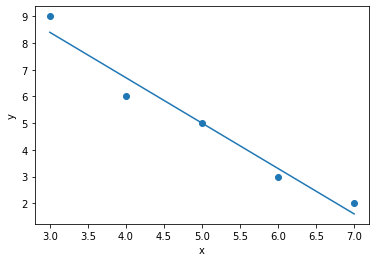

In [15]:
plt.scatter(x=data_train["x"], y=data_train["y"])
plt.plot(data_train["x"], model.predict(data_train["x"])) # best fit line
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Plotting best fit line within a range (extrapolate results)

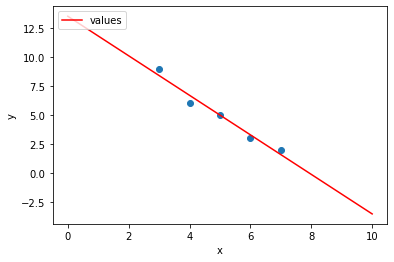

In [16]:
m = model.coef_[0]
c = model.intercept_[0]
x_values = np.linspace(0,10) # start, end, number of points (optional, default 50)
y_values = m * x_values + c
plt.scatter(x=data_train["x"], y=data_train["y"])
plt.plot(x_values, y_values, '-r', label='values') # x, y, colour, label

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper left')
# plt.xlim(0) # set limit of x-axis (lower, upper)
# plt.ylim(0) # set limit of y-axis (lower, upper)
plt.show()

## Polynomial Regression

In [22]:
data_train = {
    # "x": np.array([3, 4, 5, 6, 7]).reshape(-1, 1), # single feature
    "x": np.array([ # mutiple features
        [1, 2, 3],
        [4, 0 ,6],
        [1, 1, 0],
        [0, 1, 2],
        [5, 7, -2],
        [-1, 4, 0]
    ]),
    "y": np.array([
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1]
    ])
}
X = data_train["x"]
y = data_train["y"]

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=True)
print(poly.fit_transform(np.array([[2, 3]])))

xx = np.array([4, 7, 10, 2, 3, 9]).reshape(-1,1)
yy = np.array([-1, -1, -1, 1, 1, 1]).reshape(-1,1)

poly = PolynomialFeatures(degree=4, include_bias=False)
P = poly.fit_transform(xx)
w = solveSLE(P,yy)

print(poly.fit_transform(np.array([[9]])) @ w)

[[1. 2. 3. 4. 6. 9.]]
Solving for least squares solution in an over-determined system
[[0.63678033]]


## Predicting Data (More Examples)

### Linear Regression

In [24]:
w_lin = solveSLE(addBias(X), y)

print("Linear prediction")
# Using matrix multiplication
print(np.array([1, 1, -2, 3]) @ w_lin) # manually include bias

# Using LinearRegression
model_lin = LinearRegression(fit_intercept=True).fit(X, y)
model_lin.predict(np.array([[1, -2, 3]]))

Solving for least squares solution in an over-determined system
Linear prediction
[0.24114004 0.6696966  0.08916336]


array([[0.24114004, 0.6696966 , 0.08916336]])

### Polynomial Regression

In [25]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly.fit_transform(X) # P - [x, x^2, ^3, ...] (up to degree i)
w_poly = solveSLE(X_poly, y) 

print("Polynomial prediction")
# Using matrix multiplication
X_pred = poly.fit_transform(np.array([[1, -2, 3]])) # exclude bias, will be added by PolynomialFeatures
print(X_pred @ w_poly)

# Using LinearRegression
model_poly = LinearRegression(fit_intercept=False).fit(X_poly, y)
model_poly.predict(X_pred)

Solving for least squares solution in an under-determined system
Polynomial prediction
[[-0.51646251  0.90008188  2.00518001]]


array([[-0.51646251,  0.90008188,  2.00518001]])

## Ridge Regression

Primal: $$\hat{w} = (P^{T}P + \lambda I)^{-1} P^{T} y$$
Dual: $$\hat{w} = P^{T} (PP^{T} + \lambda I)^{-1} y$$

Both can be used regardless of over/under-determined inputs

In [26]:
train_x = np.array([-10, -8, -3, -1, 2, 7]).reshape(-1, 1)
train_y = np.array([4.18, 2.42, 0.22, 0.12, 0.25, 3.09]).reshape(-1, 1)
test_x = np.array([-9, -7, -5, -4, -2, 1, 4, 5, 6, 9]).reshape(-1, 1)
test_y = np.array([3, 1.81, 0.80, 0.25, -0.19, 0.4, 1.24, 1.68, 2.32, 5.05]).reshape(-1, 1)

__Without Ridge Regression__

MSE 1: [3.00064782]
0.007778855562167977
MSE 2: [0.02959459]
0.018547725714711076


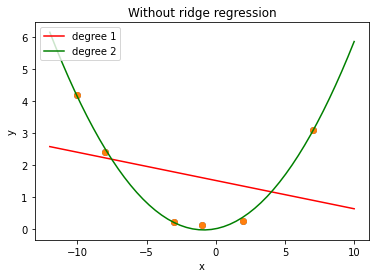

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
colours = ["-r", "-g", "-b", "-y", "-m", "-c"]

for i in range(1, 3):
    # training the model of degree i
    poly_n = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_n.fit_transform(train_x) # P - [x, x^2, ^3, ...] (up to degree i)
    poly_reg_model = LinearRegression(fit_intercept=True) # bias is included here
    poly_reg_model.fit(poly_features, train_y)
    
    # testing the model with test set
    test_features = poly_n.fit_transform(test_x)
    y_pred = poly_reg_model.predict(test_features)
    
    # output MSE compared to actual values
    print(f"MSE {i}: {(np.square(y_pred - test_y)).mean(axis=0)}")
    
    # plot predicted and actual values
    x_values = np.linspace(-12,10) # start, end, number of points (optional, default 50)
    plot_features = poly_n.fit_transform(x_values.reshape(-1, 1))
    y_plot = poly_reg_model.predict(plot_features)
    
    plt.scatter(x=train_x, y=train_y)
    plt.plot(x_values, y_plot, colours[i-1], label=f"degree {i}") # x, y, colour, label
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper left')
    plt.title("Without ridge regression")
    
    print(np.square(np.sum(poly_reg_model.coef_)))
plt.show()

__With Ridge Regression__

MSE 1: [2.99505644]
0.007701196924598692
MSE 2: [0.03040607]
0.018353462517546444


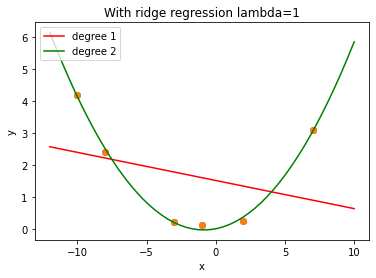

In [28]:
from sklearn.linear_model import Ridge
for i in range(1, 3):
    # training the model of degree i
    poly_n = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_n.fit_transform(train_x) # P - [x, x^2, ^3, ...] (up to degree i)
    ridge_model = Ridge(alpha=1.0, fit_intercept=True) # bias is included here
    ridge_model.fit(poly_features, train_y)
    
    # testing the model with test set
    test_features = poly_n.fit_transform(test_x)
    y_pred = ridge_model.predict(test_features)
    
    # output MSE compared to actual values
    print(f"MSE {i}: {(np.square(y_pred - test_y)).mean(axis=0)}")
    
    # plot predicted and actual values
    x_values = np.linspace(-12,10) # start, end, number of points (optional, default 50)
    plot_features = poly_n.fit_transform(x_values.reshape(-1, 1))
    y_plot = ridge_model.predict(plot_features)
    
    plt.scatter(x=train_x, y=train_y)
    plt.plot(x_values, y_plot, colours[i-1], label=f"degree {i}") # x, y, colour, label
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc='upper left')
    plt.title("With ridge regression lambda=1")
    
    print(np.square(np.sum(ridge_model.coef_)))
plt.show()

## Gradient Descent

In [29]:
import numpy as np
def descend(initial, rate, iterations, cost):
    w = initial
    for i in range(iterations): # usually either until a certain condition is met
        w = w - rate * cost(w)
    return w

In [30]:
INITIAL = 64
LEARNING_RATE = 0.2
NUM_ITERATIONS = 1

# f(x) = x^4
def cost_fn(x): # usually a derivative
    return 4 * x**3

descend(INITIAL, LEARNING_RATE, NUM_ITERATIONS, cost_fn)

-209651.2

## Classifying Data

### Impurity measures (Q)

__Gini Impurity__

$1 - \sum_{i=1}^{k} p_i^2$

__Entropy__ 

$ - \sum_{i=1}^{k} p_i log_2 p_i$

__Misclassification Rate__

$1 - max(p_1, p_2, ..., p_k)$

_To calculate impurity at each depth, sum the child impurities proportionally_

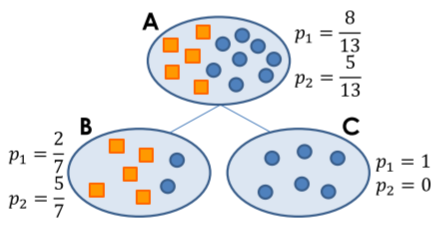

In [31]:
from math import log
def calcGini(n):
    res = 1
    for i in n:
        res -= i**2
    return res
def calcEntropy(n):
    res = 0
    for i in n:
        if i > 0:
            res += i * log(i, 2)
    return res * -1
def calcMisclassRate(n):
    return 1 - max(n)

In [32]:
import numpy as np
# p1: blue, p2: red, p3: orange
A = np.array([8/18, 5/18, 5/18])
B = np.array([6/10, 4/10, 0/10])
C = np.array([2/8, 1/8, 5/8])

In [33]:
print("Gini A: ", calcGini(A))
print("Entropy B: ", calcEntropy(B))
print("Misclassification C: ", calcMisclassRate(C))

Gini A:  0.6481481481481481
Entropy B:  0.9709505944546686
Misclassification C:  0.375


### Decision Tree

Used to predict __discrete__ variables

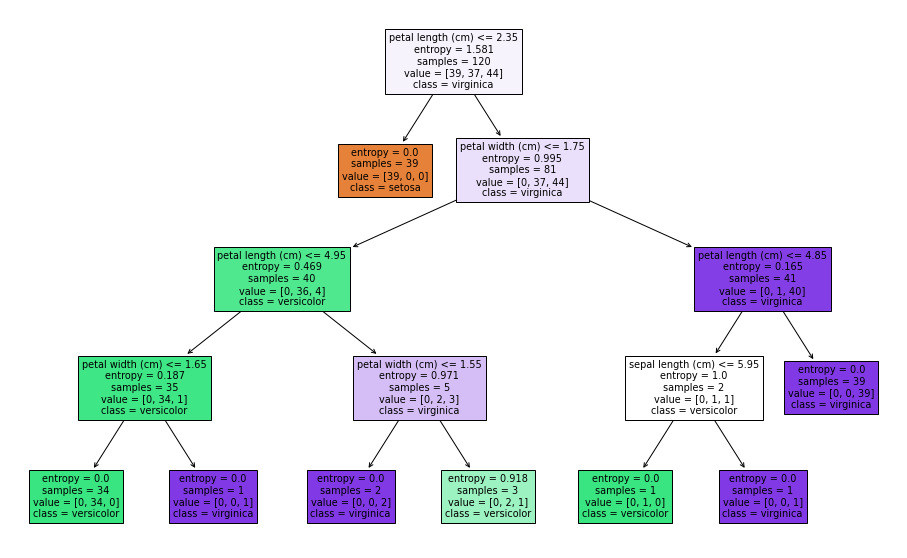

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
li = load_iris()
X_train, X_test, y_train, y_test = train_test_split(li.data, li.target, random_state=0, test_size=0.2)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4).fit(X_train,y_train)
y_pred = clf.predict(X_test)

plt.figure(figsize=(16, 10))
plot_tree(clf, 
          feature_names=li.feature_names, 
          class_names=li.target_names, 
          filled=True
         )
plt.show()

### Regression Tree

Used to predict __continuous__ variables

In [35]:
# x2 = np.array([1, 0.8, 2, 2.5, 3, 4, 4.2, 6, 6.3, 7, 8, 8.2, 9]).reshape(-1,1)
# y2 = np.array([2, 3, 2.5, 1, 2.3, 2.8, 1.5, 2.6, 3.5, 4, 3.5, 5, 4.5]).reshape(-1,1)

x2 = np.array([0.1, 0.7, 1.6, 2.2, 3.6, 4.1, 4.4, 5.2, 6.2, 7.3]).reshape(-1,1)
y2 = np.array([1.9, 1.5, 5.4, 6.1, 8.9, 9.5, 9.6, 12.9, 13.6, 15.7]).reshape(-1,1)

print(np.hstack((x2,y2)))
less = y2[x2<4]
more = y2[x2>=4]
print(y2[x2<4], np.mean(y2[x2<4]))
print(y2[x2>=4], np.mean(y2[x2>=4]))
print(np.mean((less - np.mean(less))**2))
print(np.mean((more - np.mean(more))**2))
print(np.mean((y2 - np.mean(y2))**2))

[[ 0.1  1.9]
 [ 0.7  1.5]
 [ 1.6  5.4]
 [ 2.2  6.1]
 [ 3.6  8.9]
 [ 4.1  9.5]
 [ 4.4  9.6]
 [ 5.2 12.9]
 [ 6.2 13.6]
 [ 7.3 15.7]]
[1.9 1.5 5.4 6.1 8.9] 4.76
[ 9.5  9.6 12.9 13.6 15.7] 12.26
7.6304
5.7463999999999995
20.750899999999998


In [36]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=1, criterion="squared_error")
regr.fit(x2, y2)
pred_y2 = regr.predict(x2)

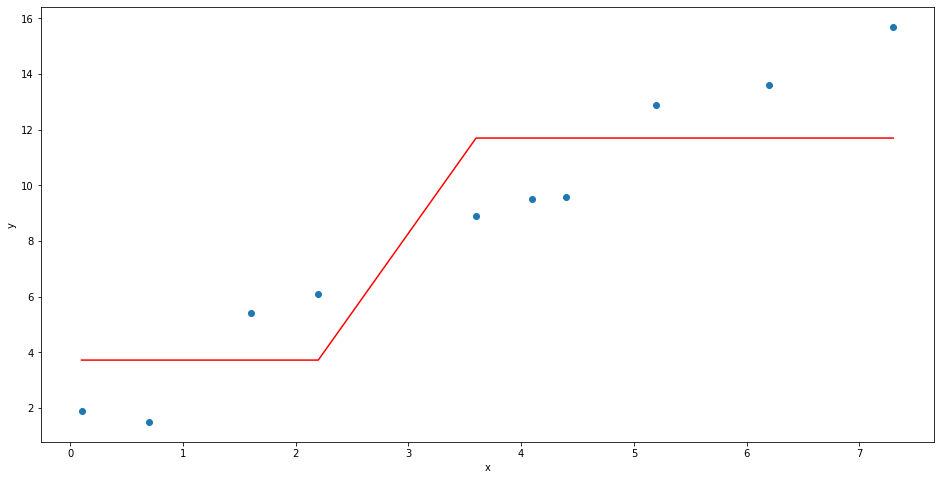

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.scatter(x=x2, y=y2)
plt.plot(x2, pred_y2, "-r") # x, y, colour, label

plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0) # set limit of x-axis (lower, upper)
# plt.ylim(0) # set limit of y-axis (lower, upper)
plt.show()

## Evaluating Performance

### Validation of data

__Priority of accuracy__
1. Mamimise accuracy of validation set (unseen data)
2. (Tie-breaker) Maximise accuracy of training set (Prevent overfitting)


### Confusion Matrix

|      CM      | Predict $\hat{P}_1$ | Predict $\hat{P}_2$ |
| ------------ | ------------------- | ------------------- |
| Actual $P_1$ | TP                  | FN (Type 2 Error)   |
| Actual $P_2$ | FP (Type 1 Error)   | TN                  |

| Error | Interpretation |
|---|---|
| Type 1 | False Positive / False Alarm / Overestimation |
| Type 2 | False Negative / Miss / Underestimation |

__Imbalanced Classification__

Typically
- Majority class $\Rightarrow$ Label 0 (Negative)
- Minority class $\Rightarrow$ Label 1 (Positive) 

__Formulas__

- Recall / Sensitivity / Hit Rate / True Positive Rate (TPR) $ = \frac{TP}{TP + FN} = 1 - FNR$
- Miss Rate / False Negative Rate (FNR) $ = \frac{FN}{TP + FN} = 1 - TPR$


- Selectivity / Specificity / True Negative Rate (TNR) $ = \frac{TN}{TN + FP} = 1 - FPR$
- Fall-out / False Positive Rate $ = \frac{FP}{TN + FP} = 1 - TNR$


- Precision / Positive Predictive Value (PPV) $ = \frac{TP}{TP + FP} = 1 - FDR$
- False Discovery Rate (FDR) $ = \frac{FP}{TP + FP} = 1 - PPV$


- False Omission Rate (FOR) $ = \frac{FN}{FN + TN} = 1 - NPV$
- Negative Predictive Value (NPV) $ = \frac{TN}{FN + TN} = 1 - FOR$


- Classification Accuracy $ = \frac{TP + TN}{TP + TN + FP + FN}$

### Visualising Metrics

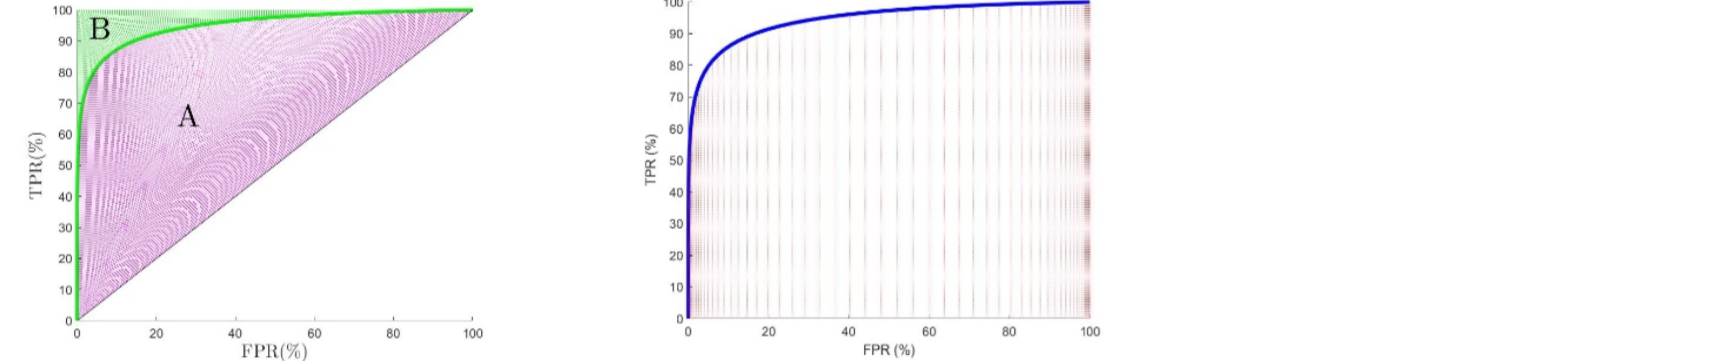

__Gini Coefficient Curve__

Area of $A + B = \frac{1}{2} \times$ Area of whole plot

Gini $G = \frac{A}{A + B}$

__Receiver Operating Characteristic (ROC) Curve__

Shows the boundary between $A$ and $B$ from Gini Coefficient Curve

$AUC\ =\ (\frac{1}{2} \times $ Area of whole plot $)\ +\ A$

Assume Area = 1, then $A = AUC\ -\ \frac{1}{2}$

__Relationship between Gini and AUC__

$G = 2 \times AUC - 1$

## Clustering

For manual calculation see `k_means.xlsx`

In [38]:
# Calculate new centroid location after x iterations
def find_new_centroids(data, start_points, num_iterations, K, output=True):
    import numpy as np
    import pandas as pd
    from math import sqrt
    from sklearn.cluster import KMeans
    
    df = pd.DataFrame(data)
    ni = num_iterations # number of iterations
    nd = len(data[0]) # number of dimensions
    cc = start_points
    
    for i in range(ni):
        # n_init refers to the possible sets of initial starting points (not random)
        km = KMeans(n_clusters=K, init=cc, n_init=1)
        km.fit(data)
        cc = km.cluster_centers_
        for j in range(len(cc)):
            df[f"Distance to C_{j+1}"] = np.sqrt(sum([(df[a] - cc[j][a])**2 for a in range(nd)]))
        if(output):
            print(f"Updated Centroid location (Iteration {i+1}):\n", cc)
            print(df,'\n')
        
    return cc, km

# ⚠️ need to manually validate data dimensionality
start = np.array([[0,0], [3,0]])
X = np.array([
    [0,0], [0,1],
    [1,1], [1,0],
    [3,0], [3,1],
    [4,0], [4,1]
])

find_new_centroids(data=X, start_points=start, K=2 , num_iterations=2)

Updated Centroid location (Iteration 1):
 [[0.5 0.5]
 [3.5 0.5]]
   0  1  Distance to C_1  Distance to C_2
0  0  0         0.707107         3.535534
1  0  1         0.707107         3.535534
2  1  1         0.707107         2.549510
3  1  0         0.707107         2.549510
4  3  0         2.549510         0.707107
5  3  1         2.549510         0.707107
6  4  0         3.535534         0.707107
7  4  1         3.535534         0.707107 

Updated Centroid location (Iteration 2):
 [[0.5 0.5]
 [3.5 0.5]]
   0  1  Distance to C_1  Distance to C_2
0  0  0         0.707107         3.535534
1  0  1         0.707107         3.535534
2  1  1         0.707107         2.549510
3  1  0         0.707107         2.549510
4  3  0         2.549510         0.707107
5  3  1         2.549510         0.707107
6  4  0         3.535534         0.707107
7  4  1         3.535534         0.707107 



(array([[0.5, 0.5],
        [3.5, 0.5]]),
 KMeans(init=array([[0.5, 0.5],
        [3.5, 0.5]]), n_clusters=2, n_init=1))

### Visualise clustering with K-Means

In [39]:
def visualise_clusters(data, start_points, num_iterations, K): # K is the number of desired clusters
    _, km = find_new_centroids(data, start_points, num_iterations, K, False)

    label = km.fit_predict(data)
    c = [[] for i in range(K)]
    
    for i in range(len(label)):
        c[label[i]].append([data[i,0], data[i,1]])

    for i in range(K):
        c[i] = np.array(c[i])
        plt.scatter(c[i][:,0], c[i][:,1])
    plt.show()

In [40]:
## Generate data 
## Set three centers, the model should predict similar results 
center_1 = np.array([2,2]) 
center_2 = np.array([4,4]) 
center_3 = np.array([6,1])
## Generate random data and center it to the three centers 
data_1 = np.random.randn(200, 2) + center_1 
data_2 = np.random.randn(200,2) + center_2 
data_3 = np.random.randn(200,2) + center_3 
data = np.concatenate((data_1, data_2, data_3), axis = 0)

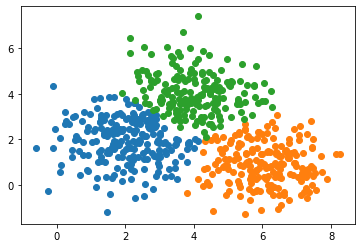

In [41]:
from random import randint
K = 3
iterations = 3
start = [randint(0, len(data)-1) for i in range(K)]
centers = np.array([data[a] for a in start]) 
visualise_clusters(data,centers,iterations,K)

## Neural Networks

In [42]:
def sigmoid(x, beta=1):
    return 1 / (1 + np.exp(-beta*x))

In [43]:
x = np.array([[1, 2, 1], [1, 5, 1]])
w1 = np.array([
    [-1, 0, 1],
    [0, -1, 0],
    [1, 0, -1]
])
w2 = np.array([
    [-1, 0, 1],
    [0, -1, 0],
    [1, 0, 1],
    [1, -1, 1]
])

In this example, $F_x(X) = f([1, f([1, f(XW_1)]W_2)]W_3)$

In [44]:
fxw1 = np.round(sigmoid(x @ w1), 4) # layer 1
f1fxw1w2 = np.round(sigmoid(addBias(fxw1) @ w2), 4) # layer 2
f1f1xw1w2w3 = np.round(sigmoid(addBias(f1fxw1w2) @ w2), 4) # layer 3, w2 = w3
print(fxw1)
print(f1fxw1w2)
print(f1f1xw1w2w3)

[[0.5    0.1192 0.5   ]
 [0.5    0.0067 0.5   ]]
[[0.4059 0.2689 0.8347]
 [0.3791 0.2689 0.8186]]
[[0.5259 0.2243 0.8913]
 [0.5219 0.2319 0.8897]]
